In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_excel('data dacp1.xlsx');df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78


# structure of the data

In [3]:
df.shape

(9551, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [5]:
df_country=pd.read_excel('Country-Code dacp1.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [7]:
final_df=pd.merge(df,df_country,how= 'inner',on='Country Code')

In [8]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# missing values

In [9]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [10]:
final_df[final_df['Restaurant Name'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1603,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


# duplicates

In [11]:
final_df.duplicated().sum()

0

# Missing Values treatment

In [12]:
final_df['Restaurant Name'].value_counts()

Cafe Coffee Day                    83
Domino's Pizza                     79
Subway                             63
Green Chick Chop                   51
McDonald's                         48
                                   ..
The Tea Place by Manjushree         1
Hind Bakery & Chinese Fast Food     1
Khansama                            1
Delhi 6 Foods                       1
Meraaki Kitchen                     1
Name: Restaurant Name, Length: 7445, dtype: int64

In [13]:
final_df['Restaurant Name'].mode()[0]

'Cafe Coffee Day'

In [14]:
final_df['Restaurant Name'].replace(np.nan,final_df['Restaurant Name'].mode()[0],inplace=True)

In [15]:
final_df['Cuisines'].value_counts()

North Indian                                                           936
North Indian, Chinese                                                  511
Fast Food                                                              354
Chinese                                                                354
North Indian, Mughlai                                                  334
                                                                      ... 
North Indian, South Indian, Fast Food, Street Food, Chinese, Mithai      1
North Indian, South Indian, Chinese, Street Food, Fast Food, Mithai      1
World Cuisine, Patisserie, Cafe                                          1
African                                                                  1
North Indian, Mangalorean, Chinese                                       1
Name: Cuisines, Length: 1825, dtype: int64

In [16]:
final_df['Cuisines'].mode()[0]

'North Indian'

In [17]:
final_df['Cuisines'].replace(np.nan,final_df['Cuisines'].mode()[0],inplace=True)

In [18]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# Performing EDA:

3.Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [19]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [20]:
final_df.groupby(['City'])

In [21]:
final_df.groupby(['City']).size().sort_values(ascending=False)

City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Length: 141, dtype: int64

In [22]:
final_df.groupby(['City']).size().sort_values(ascending=False).tail(46)

City
Huskisson           1
Tagaytay City       1
Lakes Entrance      1
Beechworth          1
East Ballina        1
Bandung             1
Balingup            1
Yorkton             1
Fernley             1
Winchester Bay      1
Flaxton             1
Tanunda             1
Inverloch           1
Weirton             1
Armidale            1
Vernonia            1
Victor Harbor       1
Vineland Station    1
Trentham East       1
Mohali              1
Monroe              1
Randburg            1
Montville           1
Miller              1
Consort             1
Middleton Beach     1
Mc Millan           1
Mayfield            1
Cochrane            1
Ojo Caliente        1
Clatskanie          1
Palm Cove           1
Panchkula           1
Forrest             1
Paynesville         1
Penola              1
Chatham-Kent        1
Phillip Island      1
Potrero             1
Macedon             1
Princeton           1
Dicky Beach         1
Lorn                1
Quezon City         1
Lincoln             1
Lakev

Observation:<br>1.New Delhi has maximum no of restaurants that are 5473<br>2. 46 Cites have minimum no of restaurants that is 1

In [23]:
final_df.groupby(['Restaurant Name','City']).size().sort_values(ascending=False)

Restaurant Name                   City     
Cafe Coffee Day                   New Delhi    57
Domino's Pizza                    New Delhi    55
Subway                            New Delhi    38
Green Chick Chop                  New Delhi    37
McDonald's                        New Delhi    33
                                               ..
Gazebo                            Abu Dhabi     1
Gayway Bakery                     New Delhi     1
Gayatri's Break Point Restaurant  New Delhi     1
Gautam Bakery                     Gurgaon       1
Ìàukura€Ùa Sofras€±               Ankara        1
Length: 7974, dtype: int64

In [24]:
f1=final_df.groupby(['Restaurant Name','City']).size()==1

In [25]:
f1.size

7974

Observations:
    1. Cafe Coffee Day has the most restaurants in New Delhi
    then  Domino's Pizza  has 55 restaurants.

4.Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

In [26]:
final_df.groupby(['Restaurant Name','Country']).size().sort_values(ascending=False)

Restaurant Name                  Country     
Cafe Coffee Day                  India           84
Domino's Pizza                   India           79
Subway                           India           63
Green Chick Chop                 India           51
McDonald's                       India           48
                                                 ..
Gibson's Gourmet Burgers & Ribs  South Africa     1
Giapo                            New Zealand      1
Giani's di Hatti                 India            1
Gian Ji Punjabi Dhaba            India            1
Ìàukura€Ùa Sofras€±              Turkey           1
Length: 7472, dtype: int64

In [27]:
cntry_dist = final_df.groupby(['Restaurant Name','Country']).agg( Count = ('Restaurant Name','count'))
cntry_dist.sort_values(by='Count',ascending=False)

,,Count
Restaurant Name,Country,
Cafe Coffee Day,India,84
Domino's Pizza,India,79
Subway,India,63
Green Chick Chop,India,51
McDonald's,India,48
...,...,...
Gibson's Gourmet Burgers & Ribs,South Africa,1
Giapo,New Zealand,1
Giani's di Hatti,India,1


Observations:
    1. Cafe Coffee Day has maximum restaurants inside india, it is followed by Dominos,Pizza and Subway

5.Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

In [28]:
final_df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [29]:
# percentage of Restaurants that not allow table booking:
round(8393/(8393+1158)*100,2)

87.88

In [30]:
# percentage of Restaurants that allow table booking:
round(1158/(8393+1158)*100,2)

12.12

Obsevation:
<br>
    1 87.88% restaurants out of total restaurants not allow table booking.
<br>    
    2. 12.12% restaurants out of total restaurants allow table booking.
    

6. Find out the percentage of restaurants providing online delivery

In [31]:
final_df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [32]:
#Percentage of restaurants providing online delivery
round(2451/(7100+2451)*100,2)

25.66

Observation: <br> 25.66% restaurants our of total restaurants providing online delivery

<br> 7. Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [33]:
final_df.shape

(9551, 20)

In [34]:
f2=final_df[['Has Online delivery','Votes']]
f2.shape

(9551, 2)

In [35]:
f2['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [36]:
Votes_res_NO_online_del=f2[f2['Has Online delivery']=='No'].reset_index()
Votes_res_NO_online_del.head(1)

,index,Has Online delivery,Votes
0,0,No,1498


In [37]:
Votes_res_NO_online_del['Votes'].sum()

980731

In [38]:
Votes_res_Online_deliver=f2[f2['Has Online delivery']=='Yes'].reset_index()
Votes_res_Online_deliver.shape

(2451, 3)

In [39]:
Votes_res_Online_deliver['Votes'].sum()

517914

In [40]:
# The Diffrence in no of Votes are:
Votes_res_NO_online_del['Votes'].sum()-Votes_res_Online_deliver['Votes'].sum()

462817

Obsevation<br>
The Diffrence in no of Votes are: 462817

# Project Task: Week 2<br>EDA


1.What are the top 10 cuisines served across cities?

In [41]:
import re

final_df.index=range(final_df.shape[0])
likes=[]
for i in range(final_df.shape[0]):
    array_split=re.split(',',final_df['Cuisines'][i])
    for item in array_split:
        likes.append(item)

In [42]:
final_df.index=range(final_df.shape[0])

In [43]:
final_df.index

RangeIndex(start=0, stop=9551, step=1)

In [44]:
print("Count of Most liked cuisines in cites")
favourite_cuisines = pd.Series(likes).value_counts()
favourite_cuisines.head(10)

Count of Most liked cuisines in cites


North Indian     3001
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
dtype: int64

Observation:<br> The top 10 cuisines are 
    

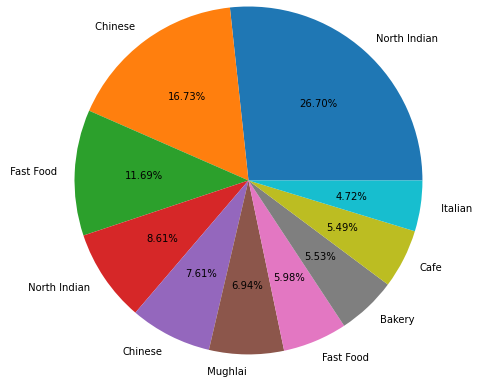

In [45]:
plt.pie(favourite_cuisines.values[:10],labels=favourite_cuisines.index[:10],radius=2,autopct='%1.2f%%');

What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

Observation:<br>Maximum number of cuisines served by the restaurants are 8.<br>Minimum no. of cuisines served by the restaurant are 1.

Observation:<br>1. cuisines_1 is the most served cuisine across the restaurant for Abu Dhabi

In [46]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

3.What is the distribution cost across the restaurants? 

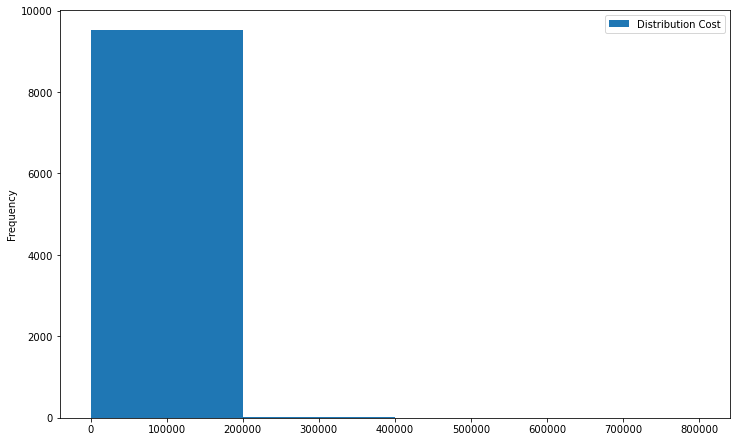

In [47]:
plt.rcParams["figure.figsize"] = (12,7.5)
final_df['Average Cost for two'].plot(kind='hist',bins=4,label='Distribution Cost')
plt.legend()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

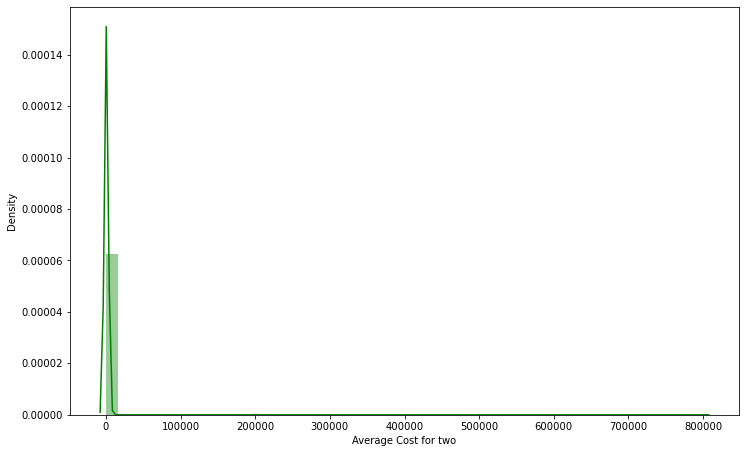

In [48]:
sns.distplot(final_df['Average Cost for two'],color="green")

4.How ratings are distributed among the various factors?

In [49]:
ratings=final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [50]:
ratings.head(10)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

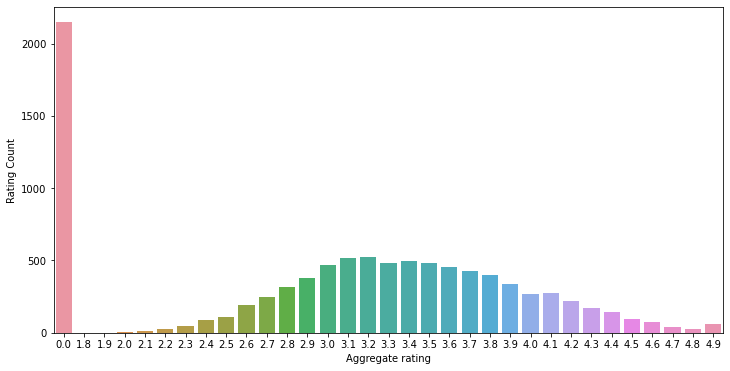

In [51]:
plt.rcParams['figure.figsize']= (12,6)
sns.barplot(x="Aggregate rating",y='Rating Count',data=ratings)

Observation:<br> After 0 rating maximum ratings are between 2.8 to 3.8

5.Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc

In [52]:
final_df[final_df['Aggregate rating']==0].groupby('Has Online delivery').size().reset_index().rename(columns={0:'Zero Rating'})

,Has Online delivery,Zero Rating
0,No,2052
1,Yes,96


Obsevation:<br>1. Those restaurants have not Online delivery get Zero Ratings more

In [53]:
final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index().sort_values(0).rename(columns={0:'Zero Rating'})

,Country,Zero Rating
2,United Kingdom,1
3,United States,3
0,Brazil,5
1,India,2139


Observation:<br>1. Maximum zero rating given from India<br>2.Minimum Zero rating given from U.K.

In [54]:
f3=final_df[final_df['Aggregate rating']==0].groupby('Average Cost for two').size().reset_index().rename(columns={0:'Zero Rating'}).sort_values('Zero Rating',ascending=False)
f3

,Average Cost for two,Zero Rating
13,300,388
10,200,342
15,400,229
17,500,200
11,250,194
7,100,185
9,150,151
14,350,137
19,600,102
16,450,56


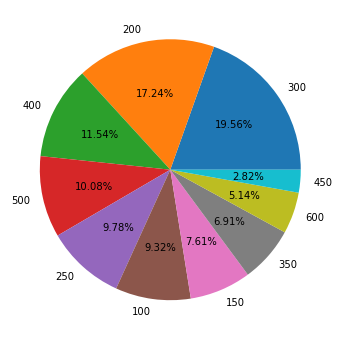

In [55]:
plt.pie(x='Zero Rating',labels='Average Cost for two',data=f3[0:10],radius=1,autopct='%1.2f%%');

Observation:<br> Rating is very less dependent on cost

In [56]:
final_df.to_excel('final_df.xlsx',index=False)

In [57]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [58]:
final_df['Cuisines_0']=final_df['Cuisines'].str.split(',').str[0]

In [59]:
final_df['Cuisines_1']=final_df['Cuisines'].str.split(',').str[1]

In [60]:
final_df['Cuisines_2']=final_df['Cuisines'].str.split(',').str[2]

In [61]:
final_df['Cuisines_3']=final_df['Cuisines'].str.split(',').str[3]

In [62]:
final_df['Cuisines_4']=final_df['Cuisines'].str.split(',').str[4]

In [63]:
final_df['Cuisines_5']=final_df['Cuisines'].str.split(',').str[5]

In [64]:
final_df['Cuisines_6']=final_df['Cuisines'].str.split(',').str[6]

In [65]:
final_df['Cuisines_7']=final_df['Cuisines'].str.split(',').str[7]

In [66]:
final_df['Cuisines_7'].notnull().sum()

14

In [67]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country', 'Cuisines_0',
       'Cuisines_1', 'Cuisines_2', 'Cuisines_3', 'Cuisines_4', 'Cuisines_5',
       'Cuisines_6', 'Cuisines_7'],
      dtype='object')

In [68]:
final_df.to_excel('final_df.xlsx',index=False)